The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 



# 1. Features Description

1.PassengerId: Unique Id of a passenger. 

2.Survived: 0: No, 1: Yes.

3.pclass:    Ticket class. 

4.Name: Name of passenger.

5.Sex: Sex of passenger.

6.Age: Age in years.

7.Sibsp:  how many siblings & spouses of the passenger aboard the Titanic..

8.Parch:  how many children & parents of the passenger aboard the Titanic.

9.Ticket: Ticket number.

10.Fare : passenger fare.

11.Cabin: cabin number.

12.Embarked: Port of Embarkation

# 2. Import Liabrary

In [1320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3 Import DataSet

In [1321]:
df=pd.read_csv("titanic.csv")

In [1322]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**There are 891 rows and 12 columns in dataset**

# 4.Basic Data Exploration

In [1323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**there are 5 features integers,2 features float and 5 features are object data type.**


In [1324]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Leyson, Mr. Robert William Norman",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**The following observation:

1. There are some missing value in Age,Cabin and Embarked columns.
2. There are some zero value in some features like SibSp and Parch,fare.
3. The dataset having 5 categorical columns and 7 numerical columns
4. The mean age of passenger is 29.6 yrs with minimum age 0.42 and maximum age of passenger is 80 yrs.
5. The maximum fare value is 512.33
6. In dataset the agv survival is 38.38%.

In [1325]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**There are null value in Age,Cabin and Embarked features in dataset.**

In [1326]:
duplicate=df.duplicated(keep="last")
duplicate.sum()

0

**There are no duplicate observation in dataset.**

# 5. Seperating dataset into numerical and categorical features

In [1327]:
numeric_feat=[]
categorical_feat=[]
num=["int64","float64"]
cat=["O"]
for column in df.columns:
    if df[column].dtypes in num:
        numeric_feat.append(column)
    if df[column].dtypes in cat:
        categorical_feat.append(column)
        

In [1328]:
numeric_feat

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [1329]:
categorical_feat

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# 6. Dealing with missing value

In [1330]:
total=df.isnull().sum().sort_values(ascending=False)
percent=df.isnull().sum()/df.isnull().count()*100
percent1=round(percent,1).sort_values(ascending=False)
missing_data=pd.concat([total,percent1],axis=1,keys=["Total","%"])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


**As we can see in above data, we have missing value in Age,Cabin and Embarked features**

## 6.1 Dealing with Age 

**Since almost 18% of missing data is from age features, we will fill those with random ages which is computed based on mean and std deviation of age and null counts.**

In [1331]:
mean=df["Age"].mean()
std=df["Age"].std()
is_null=df["Age"].isnull().sum()

In [1332]:
#finding the random age
rand_age=np.random.randint(mean-std,mean+std,is_null)

In [1333]:
len(rand_age)

177

In [1334]:
#fill nan with the random ages,which has calculated based on mean,std of the age columns.

In [1335]:
age_range=df["Age"].copy()
age_range[np.isnan(age_range)]=rand_age
df["Age"]=age_range

In [1336]:
df["Age"].isnull().sum()

0

**As we can see there is no null value in Age columns**

## 6.2 Dealing with Embarked column

**As we can know there are only 2 rows where embarked having null value. So will fill with mode of Embarked column,means maximum boarding points which available in dataset**

In [1337]:
df["Embarked"].isnull().sum()

2

In [1338]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1339]:
max_board=df["Embarked"].mode()
max_board

0    S
dtype: object

In [1340]:
df["Embarked"]=df["Embarked"].fillna(max_board[0])

In [1341]:
df["Embarked"].isnull().sum()

0

In [1342]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

**we have filled na with mode of Embarked column.**

## 6.3 Dealing with Cabin column

**As we know that cabin represent the cabin number so if there is nan means the passenger has not avail the any cabin, so we will fill this with 0.**

In [1343]:
df["Cabin"].isnull().sum()

687

In [1344]:
df["Cabin"]=df["Cabin"].fillna(0)

In [1345]:
df["Cabin"].isnull().sum()

0

In [1346]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**So we have replace all null values from the Age,Embarked and Cabin column.**

# 7. Univariate Analysis

### 7.1 Survived

In [1347]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

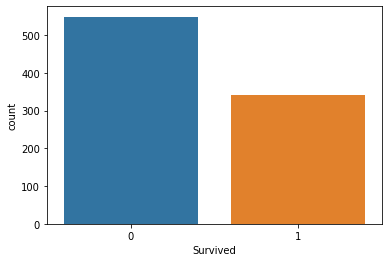

In [1348]:
sns.countplot(df["Survived"])

1. There are 549 passenger who has not survived
2. There are 342 passenger who has survived.

In [1349]:
df["Survived"].value_counts()[0]

549

In [1350]:
Survived=df["Survived"].value_counts()[1]
Not_survived=df["Survived"].value_counts()[0]

In [1351]:
print("Total number of passenger:",Survived+Not_survived)
print("**************************************************")
print("% of Survivel passenger:",format(Survived/(Survived+Not_survived)*100,".2f"))
print("% of Not Survived passenger:",format(Not_survived/(Survived+Not_survived)*100,".2f"))

Total number of passenger: 891
**************************************************
% of Survivel passenger: 38.38
% of Not Survived passenger: 61.62


In [1352]:
pd.pivot_table(df,index="Survived")

,Age,Fare,Parch,PassengerId,Pclass,SibSp
Survived,,,,,,
0,30.306922,22.117887,0.329690,447.016393,2.531876,0.553734
1,28.452251,48.395408,0.464912,444.368421,1.950292,0.473684


The following observation:
1. The avg age of 28 who has more chances of survivel, means young passenger survial probaliity was more.
2. The passenger who has paid more fare, the chances of survial is more these passeger mostly would belong to first class.
3. The passenger who had parents survivel chances was more, most there parents would have save them before.
4. The passenger who had siblings/spouse survivel chances was less.


### 7.2 Pclass

In [1353]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

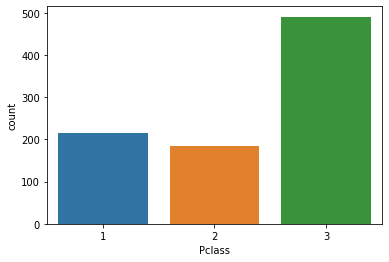

In [1354]:
sns.countplot(df["Pclass"])

In [1355]:
#pd.pivot_table(training, index = 'Pclass', values = ['Age','SibSp','Parch','Fare'])
pd.pivot_table(df,index="Pclass")

,Age,Fare,Parch,PassengerId,SibSp,Survived
Pclass,,,,,,
1,37.085278,84.154687,0.356481,461.597222,0.416667,0.629630
2,30.189293,20.662183,0.380435,445.956522,0.402174,0.472826
3,26.077230,13.675550,0.393075,439.154786,0.615071,0.242363


The following observation
1. Most passenger were belongs to 3rd class and their survivel chances was less than other class.
2. Passenger belongs to 3rd class were more young compare to other class passenger.
3. First class passenger were more old passenger than other class
4. The passenger from 3rd class had more their sibling/spouse in family aboarded.



### 7.3 Sex

In [1356]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

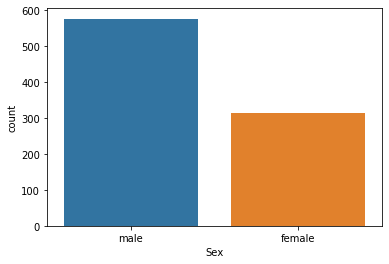

In [1357]:
sns.countplot(df["Sex"])

In [1358]:
pd.pivot_table(df,index="Sex")

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,28.022293,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
male,30.450901,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


The following observation from above table:
1. There were more male passenger were onboarded.
2. Female were paid more fare compare to male, means female had paid more who were onboarded in first class.
3. Female chances of surviving was more compare to male.

### 7.4 Age

In [1359]:
df["Age"].value_counts()

22.00    35
24.00    34
28.00    33
18.00    30
19.00    29
         ..
36.50     1
66.00     1
55.50     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

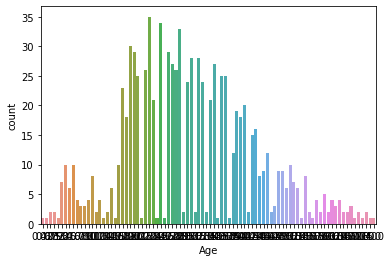

In [1360]:
sns.countplot(df["Age"])

In [1361]:
Below_18=df[df["Age"]<18].shape[0]
Mid_age=df[df["Age"].between(18,40)].shape[0]
Above_40=df[df["Age"] >40].shape[0]

In [1362]:
print("Number of passenger below 18 yrs:",Below_18)
print("Number of passenger between 18 to 40 yrs:",Mid_age)
print("Number of passenger above 40 yrs:",Above_40)

Number of passenger below 18 yrs: 129
Number of passenger between 18 to 40 yrs: 597
Number of passenger above 40 yrs: 165


In [1363]:
data={Below_18,Mid_age,Above_40}

In [1364]:
Age_segment=pd.DataFrame(data,columns=["Age"],index=["Below 18","Age 18-40","Above 40"])

In [1365]:
Age_segment

,Age
Below 18,129
Age 18-40,597
Above 40,165


1. There were 150 passenger who were more than 40 yrs old.
2. Below 18 , 113 passenger were onboarded.
3. Above 40 yrs, 150 passenger were onboarded.


### 7.5 Cabin

In [1366]:
df["Cabin"].value_counts()

0              687
B96 B98          4
C23 C25 C27      4
G6               4
F2               3
              ... 
E40              1
B86              1
C46              1
E77              1
A31              1
Name: Cabin, Length: 148, dtype: int64

1. here we can analyse that the cabin number represent the particular deck in cabin, so we will extract the deck number which represent by first Alphabet from Cabin number, in this way we can easily tranform from category to numeric.
2. As all nan has been replaceed with 0 which represent that many passenger did not had individual cabin.

# 8. Bivariate Analysis

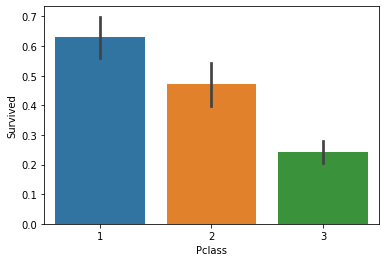

In [1367]:
sns.barplot(x="Pclass",y="Survived",data=df)

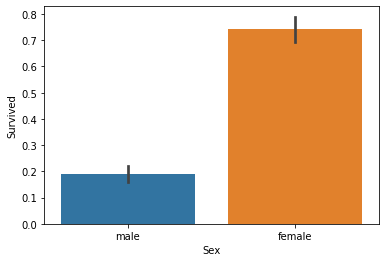

In [1368]:
sns.barplot(x="Sex",y="Survived",data=df)

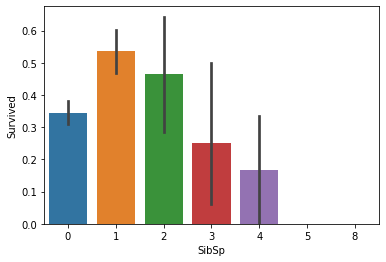

In [1369]:
sns.barplot(x="SibSp",y="Survived",data=df)

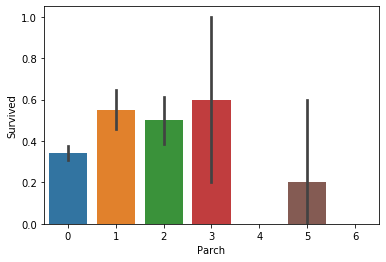

In [1370]:
sns.barplot(x="Parch",y="Survived",data=df)

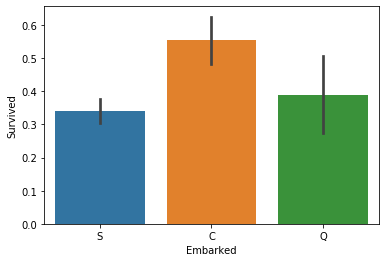

In [1371]:
sns.barplot(x="Embarked",y="Survived",data=df)

**As we can see from above plots that all features and target label of two classes are linearly seperable.**

### 8.1 Age Vs Sex

Text(0.5, 1.0, 'Female')

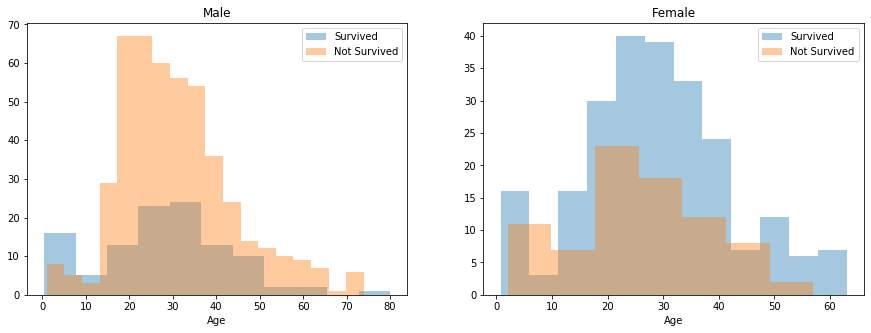

In [1372]:
survived="Survived"
not_survived="Not Survived"
men=df[df["Sex"]=="male"]
women=df[df["Sex"]=="female"]
fig,axes=plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
ax= sns.distplot(men[men["Survived"]==1].Age.dropna(),label=survived,ax=axes[0],kde=False)
ax= sns.distplot(men[men["Survived"]==0].Age.dropna(),label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title("Male")
ax= sns.distplot(women[women["Survived"]==1].Age.dropna(),label=survived,ax=axes[1],kde=False)
ax= sns.distplot(women[women["Survived"]==0].Age.dropna(),label=not_survived,ax=axes[1],kde=False)
ax.legend()
ax.set_title("Female")

**Observation:
1. Male from 18 yrs to 40 yrs range have probability of not survivel.
2. Female from 12 yrs to 40 yrs have more chances of survivel

### 8.2 Pclass Vs Age

Text(0.5, 1.0, 'Class 3')

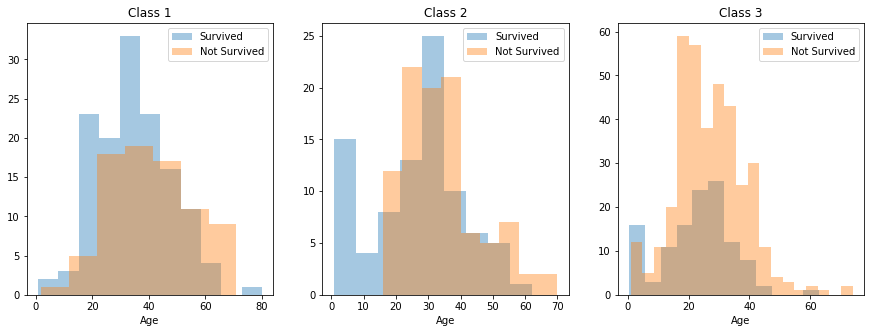

In [1373]:
survived="Survived"
not_survived="Not Survived"
class1=df[df["Pclass"]==1]
class2=df[df["Pclass"]==2]
class3=df[df["Pclass"]==3]

fig,axes=plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax= sns.distplot(class1[class1["Survived"]==1].Age.dropna(),label=survived,ax=axes[0],kde=False)
ax= sns.distplot(class1[class1["Survived"]==0].Age.dropna(),label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title("Class 1")
ax= sns.distplot(class2[class2["Survived"]==1].Age.dropna(),label=survived,ax=axes[1],kde=False)
ax= sns.distplot(class2[class2["Survived"]==0].Age.dropna(),label=not_survived,ax=axes[1],kde=False)
ax.legend()
ax.set_title("Class 2")
ax= sns.distplot(class3[class3["Survived"]==1].Age.dropna(),label=survived,ax=axes[2],kde=False)
ax= sns.distplot(class3[class3["Survived"]==0].Age.dropna(),label=not_survived,ax=axes[2],kde=False)
ax.legend()
ax.set_title("Class 3")

Observation are follow:
1. maximum passenger in class1 age from 18 yrs to 45 yrs has more probability of survivel.
2. In class 2 from 18 yrs to 40 yrs has more probaiblity of not survivel.
3. In class 3 from 18 yrs to 45 yrs range of passenger has more probability of not survivel.

### 8.3 Embarked vs Age

Text(0.5, 1.0, 'Embarked Q')

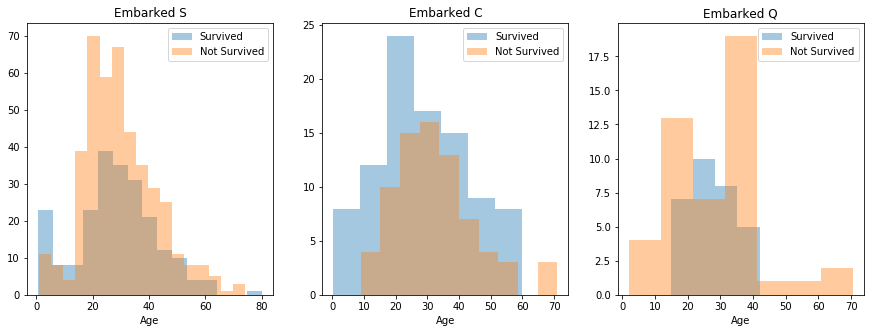

In [1374]:
survived="Survived"
not_survived="Not Survived"
Embarked_S=df[df["Embarked"]=="S"]
Embarked_C=df[df["Embarked"]=="C"]
Embarked_Q=df[df["Embarked"]=="Q"]

fig,axes=plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax= sns.distplot(Embarked_S[Embarked_S["Survived"]==1].Age.dropna(),label=survived,ax=axes[0],kde=False)
ax= sns.distplot(Embarked_S[Embarked_S["Survived"]==0].Age.dropna(),label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title("Embarked S")

ax= sns.distplot(Embarked_C[Embarked_C["Survived"]==1].Age.dropna(),label=survived,ax=axes[1],kde=False)
ax= sns.distplot(Embarked_C[Embarked_C["Survived"]==0].Age.dropna(),label=not_survived,ax=axes[1],kde=False)
ax.legend()
ax.set_title("Embarked C")
ax= sns.distplot(Embarked_Q[Embarked_Q["Survived"]==1].Age.dropna(),label=survived,ax=axes[2],kde=False)
ax= sns.distplot(Embarked_Q[Embarked_Q["Survived"]==0].Age.dropna(),label=not_survived,ax=axes[2],kde=False)
ax.legend()
ax.set_title("Embarked Q")

Observation are follow:
1. maximum passenger who has onboarded from C with age range from 20 yrs to 40 yrs has more probability of survivel.
2. Passenger who has onbarded from Q age range from 15 yrs to 40 yrs has more probaiblity of not survivel.
3. Passenger onboarded from S with age range from 18 yrs to 40 yrs has high probability of not survivel.

### 8.4 Relatives Vs Survivel

In [1375]:
df["relatives"]=df["SibSp"]+df["Parch"]

In [1376]:
df["relatives"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: relatives, Length: 891, dtype: int64

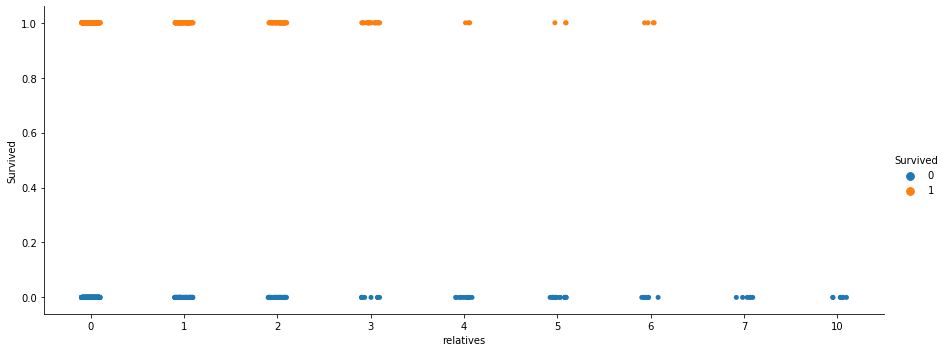

In [1377]:
sns.catplot('relatives','Survived',data=df, aspect = 2.5,hue="Survived" )

**We can see on plot passenger who has relatives more than 4 probability of survivel is very less.**

# 9. Feature Converting

### 9.1 Dealing with Name features

**We have found that name features having some initial like Mr,Mrs,Miss etc, which we can extract and replace with name which could give us information about the passenger like married,not married, occupation etc.So we will convert name columns into titile name.**

In [1378]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [1379]:
df["name_title"]=df.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [1380]:
df["name_title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
the Countess      1
Jonkheer          1
Don               1
Ms                1
Capt              1
Lady              1
Mme               1
Name: name_title, dtype: int64

In [1381]:
df["Name"]=df["name_title"]

In [1382]:
df.drop("name_title",axis=1,inplace=True)

### 9.1 Dealing with Cabin Features

In [1383]:
df["Deck"]=df.Cabin.apply(lambda x: str(x)[0])

In [1384]:
df["Cabin"]=df["Deck"]

In [1385]:
df["Cabin"].value_counts()

0    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

# 10. Feature Engineering

**As we can see Name,Sex,Cabin,Embarked feature need to convert into numercial to porceed further.**

### 10.1 Dealing with Name

**Converting Name features with one hot encoding techniques.**

In [1386]:
df["Name"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [1387]:
name_dummies=pd.get_dummies(df.Name)

In [1388]:
df=pd.concat([df,name_dummies],axis=1)

In [1389]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,1,0,0
887,888,1,1,Miss,female,19.0,0,0,112053,30.0000,...,0,1,0,0,0,0,0,0,0,0
888,889,0,3,Miss,female,27.0,1,2,W./C. 6607,23.4500,...,0,1,0,0,0,0,0,0,0,0
889,890,1,1,Mr,male,26.0,0,0,111369,30.0000,...,0,0,0,0,1,0,0,0,0,0


### 10.2 Dealing with Sex features

**Converting Sex features with one hot encoding techniques.**

In [1390]:
df["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [1391]:
Sex_dummies=pd.get_dummies(df.Sex)

In [1392]:
df=pd.concat([df,Sex_dummies],axis=1)

In [1393]:
df=df.drop(columns="Sex",axis=1)

In [1394]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,female,male
0,1,0,3,Mr,22.0,1,0,A/5 21171,7.2500,0,...,0,0,1,0,0,0,0,0,0,1
1,2,1,1,Mrs,38.0,1,0,PC 17599,71.2833,C,...,0,0,0,1,0,0,0,0,1,0
2,3,1,3,Miss,26.0,0,0,STON/O2. 3101282,7.9250,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,1,Mrs,35.0,1,0,113803,53.1000,C,...,0,0,0,1,0,0,0,0,1,0
4,5,0,3,Mr,35.0,0,0,373450,8.0500,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,27.0,0,0,211536,13.0000,0,...,0,0,0,0,0,1,0,0,0,1
887,888,1,1,Miss,19.0,0,0,112053,30.0000,B,...,0,0,0,0,0,0,0,0,1,0
888,889,0,3,Miss,27.0,1,2,W./C. 6607,23.4500,0,...,0,0,0,0,0,0,0,0,1,0
889,890,1,1,Mr,26.0,0,0,111369,30.0000,C,...,0,0,1,0,0,0,0,0,0,1


### 10.3 Dealing with Cabin features

**Converting Cabin features with one hot encoding techniques.**

In [1395]:
df["Cabin"]

0      0
1      C
2      0
3      C
4      0
      ..
886    0
887    B
888    0
889    C
890    0
Name: Cabin, Length: 891, dtype: object

In [1396]:
cabin_dummies=pd.get_dummies(df.Cabin)

In [1397]:
cabin_dummies

,0,A,B,C,D,E,F,G,T
0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
886,1,0,0,0,0,0,0,0,0
887,0,0,1,0,0,0,0,0,0
888,1,0,0,0,0,0,0,0,0
889,0,0,0,1,0,0,0,0,0


In [1398]:
df=pd.concat([df,cabin_dummies],axis=1)

In [1399]:
df=df.drop(columns="Cabin",axis=1)

In [1400]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,...,male,0,A,B,C,D,E,F,G,T
0,1,0,3,Mr,22.0,1,0,A/5 21171,7.2500,S,...,1,1,0,0,0,0,0,0,0,0
1,2,1,1,Mrs,38.0,1,0,PC 17599,71.2833,C,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,Miss,26.0,0,0,STON/O2. 3101282,7.9250,S,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,Mrs,35.0,1,0,113803,53.1000,S,...,0,0,0,0,1,0,0,0,0,0
4,5,0,3,Mr,35.0,0,0,373450,8.0500,S,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,27.0,0,0,211536,13.0000,S,...,1,1,0,0,0,0,0,0,0,0
887,888,1,1,Miss,19.0,0,0,112053,30.0000,S,...,0,0,0,1,0,0,0,0,0,0
888,889,0,3,Miss,27.0,1,2,W./C. 6607,23.4500,S,...,0,1,0,0,0,0,0,0,0,0
889,890,1,1,Mr,26.0,0,0,111369,30.0000,C,...,1,0,0,0,1,0,0,0,0,0


### 10.4 Dealing with Embarked features

**Converting Embarked features with Label Encoding techniques.**

In [1401]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [1402]:
df['Embarked']= label_encoder.fit_transform(df['Embarked'])

In [1403]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,...,male,0,A,B,C,D,E,F,G,T
0,1,0,3,Mr,22.0,1,0,A/5 21171,7.2500,2,...,1,1,0,0,0,0,0,0,0,0
1,2,1,1,Mrs,38.0,1,0,PC 17599,71.2833,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,Miss,26.0,0,0,STON/O2. 3101282,7.9250,2,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,Mrs,35.0,1,0,113803,53.1000,2,...,0,0,0,0,1,0,0,0,0,0
4,5,0,3,Mr,35.0,0,0,373450,8.0500,2,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,27.0,0,0,211536,13.0000,2,...,1,1,0,0,0,0,0,0,0,0
887,888,1,1,Miss,19.0,0,0,112053,30.0000,2,...,0,0,0,1,0,0,0,0,0,0
888,889,0,3,Miss,27.0,1,2,W./C. 6607,23.4500,2,...,0,1,0,0,0,0,0,0,0,0
889,890,1,1,Mr,26.0,0,0,111369,30.0000,0,...,1,0,0,0,1,0,0,0,0,0


In [1404]:
### 10.5  Dealing with Cabin

# 11. Dropping unwanted columns from dataset

**As Passengerid,Name,Ticket,relative features will not require for our analysis and it will not have any impact on passenger survivel so we will drop these columns.**

In [1405]:
df=df.drop(columns=["PassengerId","Name","Ticket","relatives","Deck"],axis=1)

In [1406]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Capt,Col,Don,...,male,0,A,B,C,D,E,F,G,T
0,0,3,22.0,1,0,7.2500,2,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,2,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2,0,0,0,...,1,1,0,0,0,0,0,0,0,0
887,1,1,19.0,0,0,30.0000,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
888,0,3,27.0,1,2,23.4500,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
889,1,1,26.0,0,0,30.0000,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


# 12.Spliting dataset

In [1407]:
x=df.drop("Survived",axis=1)

In [1408]:
x

,Pclass,Age,SibSp,Parch,Fare,Embarked,Capt,Col,Don,Dr,...,male,0,A,B,C,D,E,F,G,T
0,3,22.0,1,0,7.2500,2,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,26.0,0,0,7.9250,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3,35.0,0,0,8.0500,2,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,2,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
887,1,19.0,0,0,30.0000,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
888,3,27.0,1,2,23.4500,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
889,1,26.0,0,0,30.0000,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [1409]:
y=df.Survived

In [1410]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# 13. Feature Transformation with Standar scaler

In [1411]:
 from sklearn.preprocessing import StandardScaler

In [1412]:
scaler=StandardScaler()

In [1413]:
x_scaled=scaler.fit_transform(x)

In [1414]:
x_scaled

array([[ 0.82737724, -0.56410366,  0.43279337, ..., -0.12168146,
        -0.06715343, -0.03352008],
       [-1.56610693,  0.62426042,  0.43279337, ..., -0.12168146,
        -0.06715343, -0.03352008],
       [ 0.82737724, -0.26701264, -0.4745452 , ..., -0.12168146,
        -0.06715343, -0.03352008],
       ...,
       [ 0.82737724, -0.19273988,  0.43279337, ..., -0.12168146,
        -0.06715343, -0.03352008],
       [-1.56610693, -0.26701264, -0.4745452 , ..., -0.12168146,
        -0.06715343, -0.03352008],
       [ 0.82737724,  0.17862389, -0.4745452 , ..., -0.12168146,
        -0.06715343, -0.03352008]])

# 14. Model Building

## 14.1 Logistic Regression

In [1524]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [1525]:
lr=LogisticRegression()

## 14.2 Finding best random state 

In [1526]:
from sklearn.metrics import accuracy_score

for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perfrom well")
        print("At random state",i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100)
        print("Testing Accuracy score is-",accuracy_score(y_test,pred_test)*100)

At random state 18 Model perfrom well
At random state 18
Training Accuracy score is- 83.62760834670947
Testing Accuracy score is- 83.5820895522388
At random state 21 Model perfrom well
At random state 21
Training Accuracy score is- 83.62760834670947
Testing Accuracy score is- 83.5820895522388
At random state 174 Model perfrom well
At random state 174
Training Accuracy score is- 83.62760834670947
Testing Accuracy score is- 83.5820895522388
At random state 347 Model perfrom well
At random state 347
Training Accuracy score is- 82.5040128410915
Testing Accuracy score is- 82.46268656716418


**We can use best random_state is 174.**

### 14.3 Train test split

In [1527]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=174)

In [1528]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1529]:
y_pred=lr.predict(x_test)

### 14.4 Evaluation Matrix

In [1530]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_confusion_matrix


In [1531]:
accuracy_score(y_test,y_pred)

0.835820895522388

In [1532]:
confusion_matrix(y_test,y_pred)

array([[140,  18],
       [ 26,  84]], dtype=int64)

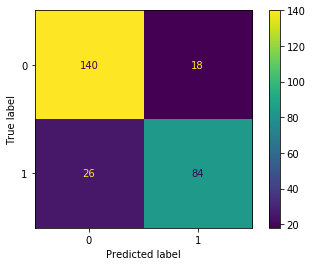

In [1533]:
plot_confusion_matrix(lr,x_test,y_test,values_format=".3g")

In [1534]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       158
           1       0.82      0.76      0.79       110

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.84      0.84      0.83       268



In [1535]:
lr_acc_score=accuracy_score(y_test,y_pred)

In [1536]:
lr_acc_score

0.835820895522388

### 14.5 Cross validation technique

In [1537]:
from sklearn.model_selection import cross_val_score,cross_validate

In [1538]:
cross_val_score(lr,x_scaled,y,cv=5)

array([0.82122905, 0.82022472, 0.79775281, 0.81460674, 0.85955056])

In [1539]:
lr_cv_score=cross_val_score(lr,x_scaled,y,cv=5).mean()

In [1540]:
lr_cv_score

0.8226727763480006

### 14.6 Finding best CV

In [1541]:
for j in range(2,15):
    lr_score=cross_val_score(lr,x_scaled,y,cv=j)
    lr_s=lr_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",lr_score*100)
    print("Accuracy Score:",lr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [81.83856502 83.14606742]
Accuracy Score: 82.49231621907593


At CV:- 3
Cross validation score is: [79.46127946 81.14478114 83.83838384]
Accuracy Score: 81.48148148148148


At CV:- 4
Cross validation score is: [78.92376682 82.06278027 80.2690583  85.58558559]
Accuracy Score: 81.71029774168788


At CV:- 5
Cross validation score is: [82.12290503 82.02247191 79.7752809  81.46067416 85.95505618]
Accuracy Score: 82.26727763480007


At CV:- 6
Cross validation score is: [79.19463087 81.87919463 84.56375839 80.40540541 82.43243243 85.81081081]
Accuracy Score: 82.38103875687767


At CV:- 7
Cross validation score is: [78.125      83.59375    85.03937008 79.52755906 81.88976378 81.88976378
 85.82677165]
Accuracy Score: 82.2702826209224


At CV:- 8
Cross validation score is: [78.57142857 82.14285714 83.03571429 83.78378378 80.18018018 79.27927928
 84.68468468 85.58558559]
Accuracy Score: 82.1579391891892


At CV:- 9
Cross validation score is: [78.78787879 83.83

**As we can see best CV score is when cv=14.**

In [1542]:
cross_val_score(lr,x_scaled,y,cv=14)

array([0.78125   , 0.796875  , 0.875     , 0.796875  , 0.796875  ,
       0.90625   , 0.796875  , 0.78125   , 0.796875  , 0.84126984,
       0.76190476, 0.9047619 , 0.82539683, 0.9047619 ])

In [1543]:
lr_cv_score=cross_val_score(lr,x_scaled,y,cv=14).mean()

In [1544]:
lr_cv_score

0.8261585884353744

# 15. KNN

In [1545]:
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=174)

In [1546]:
knn=KNeighborsClassifier()

In [1547]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [1548]:
y_pred=knn.predict(x_test)

### 15.1 Evaluation matrix

In [1549]:
accuracy_score(y_test,y_pred)

0.8246268656716418

In [1550]:
confusion_matrix(y_test,y_pred)

array([[142,  16],
       [ 31,  79]], dtype=int64)

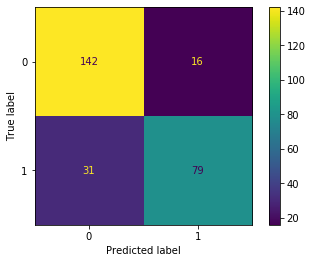

In [1551]:
plot_confusion_matrix(knn,x_test,y_test,values_format=".3g")

In [1552]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       158
           1       0.83      0.72      0.77       110

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.83      0.82      0.82       268



In [1553]:
knn_acc_score=accuracy_score(y_test,y_pred)

In [1554]:
knn_acc_score

0.8246268656716418

### 15.2 Cross validation 

In [1555]:
from sklearn.model_selection import cross_val_score,cross_validate

In [1556]:
cross_val_score(knn,x_scaled,y,cv=5)

array([0.79888268, 0.76966292, 0.84831461, 0.80898876, 0.87078652])

In [1557]:
knn_cv_score=cross_val_score(knn,x_scaled,y,cv=5).mean()

In [1558]:
knn_cv_score

0.819327098110602

### 15.3 Finding best CV

In [1559]:
for j in range(2,15):
    knn_score=cross_val_score(knn,x_scaled,y,cv=j)
    knn_s=knn_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",knn_score*100)
    print("Accuracy Score:",knn_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [78.47533632 80.2247191 ]
Accuracy Score: 79.35002771199677


At CV:- 3
Cross validation score is: [78.11447811 82.49158249 82.82828283]
Accuracy Score: 81.14478114478115


At CV:- 4
Cross validation score is: [76.23318386 80.71748879 80.71748879 83.78378378]
Accuracy Score: 80.36298630469034


At CV:- 5
Cross validation score is: [79.88826816 76.96629213 84.83146067 80.8988764  87.07865169]
Accuracy Score: 81.9327098110602


At CV:- 6
Cross validation score is: [79.86577181 79.19463087 83.22147651 81.75675676 83.10810811 85.81081081]
Accuracy Score: 82.15959247838441


At CV:- 7
Cross validation score is: [81.25       79.6875     82.67716535 83.46456693 82.67716535 81.88976378
 84.2519685 ]
Accuracy Score: 82.27116141732284


At CV:- 8
Cross validation score is: [81.25       77.67857143 81.25       84.68468468 82.88288288 78.37837838
 83.78378378 84.68468468]
Accuracy Score: 81.82412323037323


At CV:- 9
Cross validation score is: [80.80808081 75.7

**Best CV we can choose 7.**

In [1560]:
cross_val_score(knn,x_scaled,y,cv=7)

array([0.8125    , 0.796875  , 0.82677165, 0.83464567, 0.82677165,
       0.81889764, 0.84251969])

In [1561]:
knn_cv_score=cross_val_score(knn,x_scaled,y,cv=7).mean()

In [1562]:
knn_cv_score

0.8227116141732285

# 16. Random Forest

In [1564]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=174)

In [1565]:
rf=RandomForestClassifier()

In [1566]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1567]:
y_pred=rf.predict(x_test)

### 16.1 Evaluation matrix

In [1568]:
accuracy_score(y_test,y_pred)

0.8208955223880597

In [1569]:
rf_acc_score=accuracy_score(y_test,y_pred)

In [1570]:
rf_acc_score

0.8208955223880597

In [1571]:
confusion_matrix(y_test,y_pred)

array([[141,  17],
       [ 31,  79]], dtype=int64)

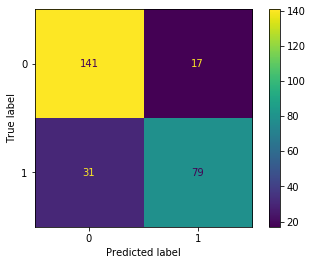

In [1572]:
plot_confusion_matrix(rf,x_test,y_test,values_format=".3g")

### 16.2 Cross validation

In [1573]:
cross_val_score(rf,x_scaled,y,cv=5)

array([0.79888268, 0.80898876, 0.84831461, 0.76966292, 0.82022472])

In [1574]:
rf_cv_score=cross_val_score(rf,x_scaled,y,cv=5).mean()

In [1575]:
rf_cv_score

0.8069612704789405

### 16.3 Finding best CV

In [1576]:
for j in range(2,15):
    rf_score=cross_val_score(rf,x_scaled,y,cv=j)
    rf_s=rf_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",rf_score*100)
    print("Accuracy Score:",rf_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [76.23318386 79.5505618 ]
Accuracy Score: 77.89187282712753


At CV:- 3
Cross validation score is: [78.78787879 80.47138047 79.46127946]
Accuracy Score: 79.57351290684623


At CV:- 4
Cross validation score is: [78.47533632 82.95964126 80.71748879 81.53153153]
Accuracy Score: 80.92099947481113


At CV:- 5
Cross validation score is: [79.88826816 79.21348315 83.14606742 76.96629213 82.02247191]
Accuracy Score: 80.24731655263324


At CV:- 6
Cross validation score is: [77.18120805 78.52348993 85.23489933 79.05405405 78.37837838 82.43243243]
Accuracy Score: 80.13407703005018


At CV:- 7
Cross validation score is: [80.46875    81.25       85.03937008 81.88976378 81.1023622  79.52755906
 83.46456693]
Accuracy Score: 81.82033886389203


At CV:- 8
Cross validation score is: [81.25       80.35714286 79.46428571 81.98198198 82.88288288 74.77477477
 80.18018018 82.88288288]
Accuracy Score: 80.47176640926641


At CV:- 9
Cross validation score is: [77.77777778 80.

**we can choose cv=10.**

In [1577]:
cross_val_score(rf,x_scaled,y,cv=10)

array([0.78888889, 0.83146067, 0.7752809 , 0.84269663, 0.85393258,
       0.79775281, 0.78651685, 0.80898876, 0.85393258, 0.83146067])

In [1578]:
rf_cv_score=cross_val_score(rf,x_scaled,y,cv=10).mean()

In [1579]:
rf_cv_score

0.8227215980024969

# 17 Ada Boost

In [1593]:
from sklearn.ensemble import AdaBoostClassifier
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=174)

In [1594]:
adc=AdaBoostClassifier()

In [1595]:
adc.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [1596]:
y_pred=dt.predict(x_test)

### 17.1 Evaluation Matrix

In [1597]:
accuracy_score(y_test,y_pred)

0.9253731343283582

In [1598]:
adc_acc_score=accuracy_score(y_test,y_pred)

In [1599]:
adc_acc_score

0.9253731343283582

In [1600]:
confusion_matrix(y_test,y_pred)

array([[154,   4],
       [ 16,  94]], dtype=int64)

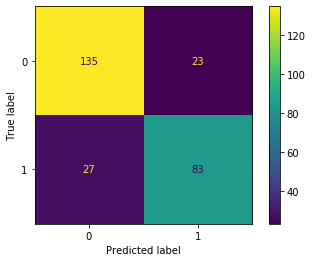

In [1601]:
plot_confusion_matrix(adc,x_test,y_test,values_format=".3g")

### 17.2 Cross validation

In [1602]:
cross_val_score(rf,x_scaled,y,cv=5)

array([0.80446927, 0.79775281, 0.84269663, 0.76966292, 0.82022472])

In [1603]:
adc_cv_score=cross_val_score(rf,x_scaled,y,cv=5).mean()

In [1604]:
adc_cv_score

0.8114430983616847

### 17.3 Best CV

In [1605]:
for j in range(2,15):
    adc_score=cross_val_score(adc,x_scaled,y,cv=j)
    adc_s=adc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",adc_score*100)
    print("Accuracy Score:",adc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [78.69955157 81.12359551]
Accuracy Score: 79.91157353756235


At CV:- 3
Cross validation score is: [77.1043771  80.47138047 83.83838384]
Accuracy Score: 80.47138047138046


At CV:- 4
Cross validation score is: [78.02690583 82.95964126 79.37219731 84.23423423]
Accuracy Score: 81.14824465721327


At CV:- 5
Cross validation score is: [76.53631285 79.21348315 79.7752809  83.70786517 85.39325843]
Accuracy Score: 80.92524009792228


At CV:- 6
Cross validation score is: [75.16778523 77.85234899 85.90604027 78.37837838 85.81081081 83.78378378]
Accuracy Score: 81.14985791160288


At CV:- 7
Cross validation score is: [75.78125    82.03125    82.67716535 81.1023622  85.82677165 81.1023622
 83.46456693]
Accuracy Score: 81.71224690663668


At CV:- 8
Cross validation score is: [78.57142857 81.25       78.57142857 83.78378378 80.18018018 84.68468468
 81.98198198 82.88288288]
Accuracy Score: 81.48829633204633


At CV:- 9
Cross validation score is: [75.75757576 79.7

**Best cv is 12.**

In [1606]:
cross_val_score(rf,x_scaled,y,cv=12)

array([0.77333333, 0.82666667, 0.78666667, 0.77027027, 0.89189189,
       0.83783784, 0.82432432, 0.78378378, 0.7972973 , 0.82432432,
       0.82432432, 0.86486486])

In [1607]:
adc_cv_score=cross_val_score(rf,x_scaled,y,cv=12).mean()

In [1608]:
adc_cv_score

0.8204654654654654

# 18. GRADIEN BOOSTING

In [1609]:
from sklearn.ensemble import GradientBoostingClassifier
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=174)

In [1610]:
gbc=GradientBoostingClassifier()

In [1611]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [1612]:
y_pred=gbc.predict(x_test)

### 18.1 Evaluation Matrix

In [1613]:
accuracy_score(y_test,y_pred)

0.8582089552238806

In [1614]:
gbc_acc_score=accuracy_score(y_test,y_pred)

In [1615]:
gbc_acc_score

0.8582089552238806

In [1616]:
confusion_matrix(y_test,y_pred)

array([[149,   9],
       [ 29,  81]], dtype=int64)

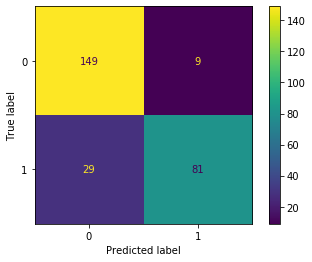

In [1617]:
plot_confusion_matrix(gbc,x_test,y_test,values_format=".3g")

### 18.2 Cross validation

In [1618]:
cross_val_score(gbc,x_scaled,y,cv=5)

array([0.82681564, 0.79213483, 0.85393258, 0.79213483, 0.84831461])

In [1619]:
gbc_cv_score=cross_val_score(gbc,x_scaled,y,cv=5).mean()

In [1620]:
gbc_cv_score

0.822666499278137

### 18.3 Finding Best CV

In [1621]:
for j in range(2,15):
    gbc_score=cross_val_score(gbc,x_scaled,y,cv=j)
    gbc_s=gbc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",gbc_score*100)
    print("Accuracy Score:",gbc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [78.47533632 81.79775281]
Accuracy Score: 80.13654456592936


At CV:- 3
Cross validation score is: [79.7979798  82.82828283 82.49158249]
Accuracy Score: 81.70594837261504


At CV:- 4
Cross validation score is: [82.06278027 85.20179372 80.2690583  82.88288288]
Accuracy Score: 82.6041287924696


At CV:- 5
Cross validation score is: [82.68156425 79.21348315 85.39325843 79.21348315 84.83146067]
Accuracy Score: 82.26664992781369


At CV:- 6
Cross validation score is: [78.52348993 81.20805369 89.26174497 80.40540541 81.75675676 85.13513514]
Accuracy Score: 82.71509764798355


At CV:- 7
Cross validation score is: [78.125      83.59375    87.4015748  83.46456693 81.88976378 79.52755906
 84.2519685 ]
Accuracy Score: 82.60774043869517


At CV:- 8
Cross validation score is: [76.78571429 81.25       83.03571429 88.28828829 84.68468468 79.27927928
 81.08108108 85.58558559]
Accuracy Score: 82.49879343629344


At CV:- 9
Cross validation score is: [78.78787879 79.7

**As we can see best cv is 10.**

In [1622]:
cross_val_score(gbc,x_scaled,y,cv=10)

array([0.77777778, 0.84269663, 0.76404494, 0.88764045, 0.86516854,
       0.83146067, 0.82022472, 0.7752809 , 0.88764045, 0.84269663])

In [1623]:
gbc_cv_score=cross_val_score(gbc,x_scaled,y,cv=11).mean()

In [1624]:
gbc_cv_score

0.8271604938271605

# 19.Lets choose the best model

### 19.1 Lets plot ROC AUC curve

In [1625]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [1626]:
model_lr=lr.fit(x_train,y_train)
model_knn=knn.fit(x_train,y_train)
model_rf=rf.fit(x_train,y_train)
model_adc=adc.fit(x_train,y_train)
model_gbc=gbc.fit(x_train,y_train)

In [1627]:
lr_pred=lr.predict(x_test)
knn_pred=knn.predict(x_test)
rf_pred=rf.predict(x_test)
adc_pred=adc.predict(x_test)
gbc_pred=gbc.predict(x_test)

In [1628]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, lr_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knn_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, adc_pred, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, gbc_pred, pos_label=1)

In [1629]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [1630]:
# auc scores
auc_score_lr = roc_auc_score(y_test, lr_pred)
auc_score_knn = roc_auc_score(y_test, knn_pred)
auc_score_rf = roc_auc_score(y_test, rf_pred)
auc_score_adc = roc_auc_score(y_test, adc_pred)
auc_score_gbc = roc_auc_score(y_test, gbc_pred)
print(round(auc_score_lr,2)*100, round(auc_score_knn,2)*100,round(auc_score_rf,2)*100,round(auc_score_adc,2)*100,round(auc_score_gbc,2)*100)

82.0 81.0 79.0 80.0 84.0


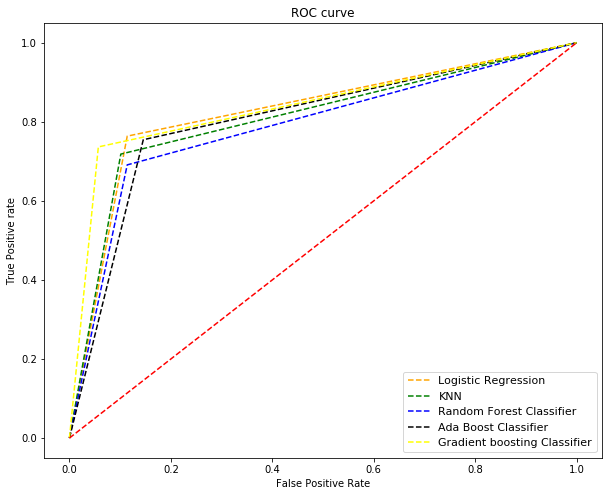

In [1631]:
plt.figure(figsize=(10,8))
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3,tpr3,linestyle='--',color='blue', label='Random Forest Classifier')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Ada Boost Classifier')
plt.plot(fpr5,tpr5,linestyle='--',color='yellow', label='Gradient boosting Classifier')

plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(prop={'size':11},loc='lower right')
plt.savefig('ROC',dpi=300)
plt.show();

**As we can see from Roc Auc Curve that Logistic Regression model is performing well in this dataset.**

# 20 Choosing best model by checking cross validation score

In [1632]:
Logistic_Regression={"Accuracy Score":(lr_acc_score,2),
                    "CV Score":(lr_cv_score,2),
                    "Difference":lr_acc_score-lr_cv_score}
Knn={"Accuracy Score":(knn_acc_score,2),
                    "CV Score":(knn_cv_score,2),
                    "Difference":knn_acc_score-knn_cv_score}
Random_Forest={"Accuracy Score":(rf_acc_score,2),
                    "CV Score":(rf_cv_score,2),
                    "Difference":rf_acc_score-rf_cv_score}
Ada_Boost={"Accuracy Score":(adc_acc_score,2),
                    "CV Score":(adc_cv_score,2),
                    "Difference":adc_acc_score-adc_cv_score}
Gradient_Boost={"Accuracy Score":(gbc_acc_score,2),
                    "CV Score":(gbc_cv_score,2),
                    "Difference":gbc_acc_score-gbc_cv_score}


In [1633]:
data=np.array([[lr_acc_score,lr_cv_score,lr_acc_score-lr_cv_score],[knn_acc_score,knn_cv_score,knn_acc_score-knn_cv_score],[rf_acc_score,rf_cv_score,rf_acc_score-rf_cv_score],[adc_acc_score,adc_cv_score,adc_acc_score-adc_cv_score],[gbc_acc_score,gbc_cv_score,gbc_acc_score-gbc_cv_score]])

In [1634]:
index_value=["LogisticRegression","KNNeighbors","RandomForest","Ada Boost","Gradient Boost"]

In [1635]:
columns_value=["Accuracy Score","Cross Validation Score","Difference"]

In [1636]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [1637]:
model_selection

,Accuracy Score,Cross Validation Score,Difference
LogisticRegression,0.835821,0.826159,0.009662
KNNeighbors,0.824627,0.822712,0.001915
RandomForest,0.820896,0.822722,-0.001826
Ada Boost,0.925373,0.820465,0.104908
Gradient Boost,0.858209,0.827160,0.031048


**So after checking the performance of accuracy score and cross validation score we are getting minimum difference for Random forest Algorithm, so we will choose Random forest model for our dataset.**

# 21. Hypertuning for our best model ( Random Forest)

In [1638]:
from sklearn.model_selection import GridSearchCV

In [1659]:
params={'n_estimators':[10,12,15,17],
       'criterion':['entropy',"gini"],
       'max_depth':[8,10,12,15],
        'min_samples_split':[6,8,10],
        'min_samples_leaf':[5,8,10]
       }

In [1660]:
grd=GridSearchCV(rf,param_grid=params)

In [1661]:
grd.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=6,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=12, n_jobs=None,
                                              oob_score=False,
                                              ra

In [1662]:
rf=grd.best_estimator_

In [1663]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1664]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1665]:
y_pred=rf.predict(x_test)

# 22. Random Forest Evaluation matrix

In [1666]:
accuracy_score(y_test,y_pred)

0.8432835820895522

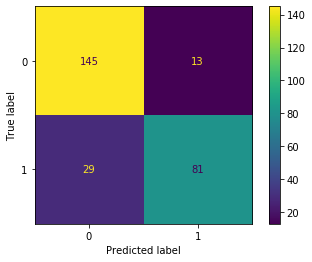

In [1667]:
plot_confusion_matrix(rf,x_test,y_test,values_format=".3g")

In [1668]:
confusion_matrix(y_test,y_pred)

array([[145,  13],
       [ 29,  81]], dtype=int64)

In [1669]:
report=classification_report(y_test,y_pred)

In [1670]:
print(report)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       158
           1       0.86      0.74      0.79       110

    accuracy                           0.84       268
   macro avg       0.85      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



**So after doing hyperparameter tuning model accuracy score has increased from 82% to 84%.**

# 23. Prediction of Titanic Surviver

In [1671]:
y_pred=rf.predict(x_test)

In [1672]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0], dtype=int64)

# 24. Saving Model

In [1673]:
import pickle
filename="titanicpredict.pkl"
pickle.dump(rf,open(filename,"wb"))